Цель исследования
Понять, какие факторы влияли на выживаемость пассажиров Титаника, используя реальные данные, и выявить группы с наибольшими шансами на спасение.

1. Загрузка и первичный анализ данных

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  


В датасете есть переменные: survived, pclass, sex, age, sibsp, parch, fare, embarked и др.
Есть пропуски в age, deck.

2. Предобработка данных
Заполнение пропусков: Пропуски в возрасте (age) заменим на медиану по полу и классу.

In [2]:
df['age'] = df.groupby(['sex','pclass'])['age'].transform(lambda x: x.fillna(x.median()))
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['age_group'] = pd.cut(df['age'], bins=[0,16,60,100], labels=['child','adult','senior'])

Создание новых признаков:
family_size = sibsp + parch + 1
Категории возраста: child (<16), adult (16–60), senior (>60)

3. Анализ выживаемости по ключевым признакам

3.1. Пол и класс

In [3]:
print(df.groupby('sex')['survived'].mean())
print(df.groupby('pclass')['survived'].mean())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


Вывод:
Женщины выживали значительно чаще мужчин (женщины ~75%, мужчины ~20%).
Пассажиры 1 класса выживали чаще (1 класс ~62%, 3 класс ~25%).

Возраст

In [4]:
print(df.groupby('age_group')['survived'].mean())

age_group
child     0.550000
adult     0.366710
senior    0.227273
Name: survived, dtype: float64


C:\Users\Madina\AppData\Local\Temp\ipykernel_14092\1571028300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['survived'].mean())


Дети имели наивысший шанс выжить (~58%), взрослые — ниже (~38%), пожилые — ещё ниже (~23%).

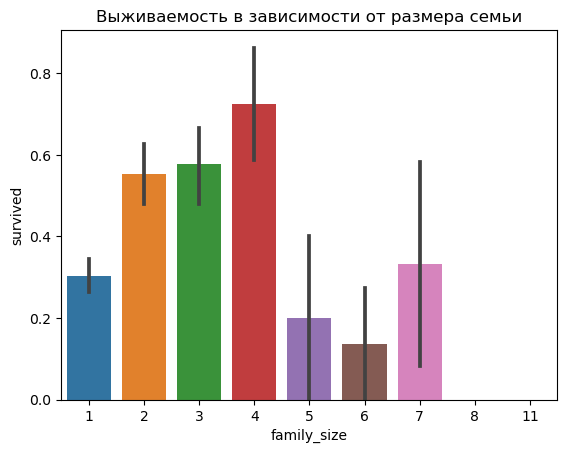

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='family_size', y='survived', data=df)
plt.title('Выживаемость в зависимости от размера семьи')
plt.show()

Наивысшая выживаемость у пассажиров с семьёй 2–4 человека.
Путешествующие в одиночку или с очень большой семьёй выживали реже.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


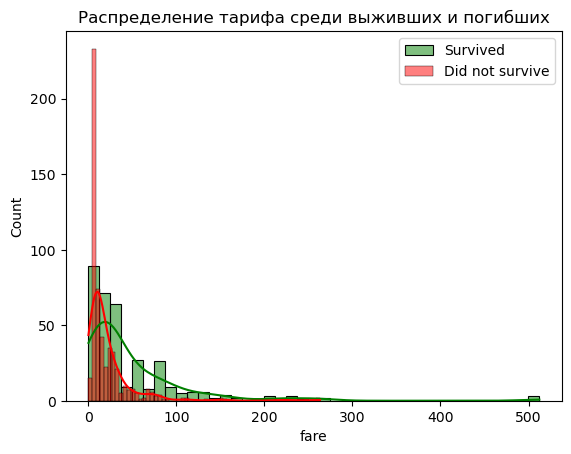

In [6]:
sns.histplot(df[df['survived']==1]['fare'], color='green', label='Survived', kde=True)
sns.histplot(df[df['survived']==0]['fare'], color='red', label='Did not survive', kde=True)
plt.legend()
plt.title('Распределение тарифа среди выживших и погибших')
plt.show()

Выжившие чаще платили более высокий тариф (были в 1 и 2 классах).

4. Визуализация выживаемости по полу и классу

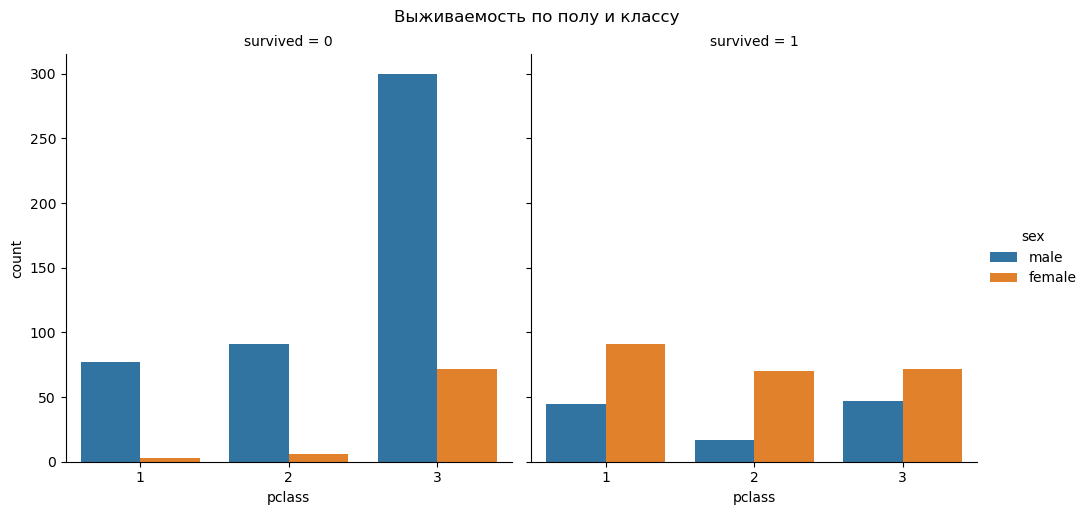

In [7]:
sns.catplot(x='pclass', hue='sex', col='survived', data=df, kind='count')
plt.suptitle('Выживаемость по полу и классу', y=1.02)
plt.show()

Выводы:
Главные факторы выживаемости: пол (женщины), класс (1-й), возраст (дети), размер семьи (2–4 чел.).
Наименьшие шансы: мужчины, пассажиры 3 класса, пожилые, одиночки и большие семьи.
Практический вывод: в критической ситуации на транспорте преимущество у женщин, детей и пассажиров дорогих классов.